# Disclaimer: This notebook was run using CDMS kernel V04-00

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from qetpy.utils import lowpassfilter 
from qetpy import autocuts
import cdms
#from CDMSDataCatalog import CDMSDataCatalog
import scipy.optimize as optimize
import matplotlib as mpl

/cvmfs/cdms.opensciencegrid.org/releases/centos7/V04-00/lib/python3.7/site-packages/datacat/model.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import OrderedDict, MutableMapping


In [2]:
import pickle as pkl
import os, sys
import ROOT as rt

Welcome to JupyROOT 6.22/00


In [45]:
#Define processed files
#catalog = CDMSDataCatalog()
#print("Will search for data at ", catalog.default_fetchdir)

#base="/sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.0/Submerged"
base = '/sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged/'
# series = {
#     'prebake' : '23231211_165227',
#     'postbake' : '23231213_115428'
# }
# series = {
#     '50V' : '23231216_145300'
# }
series = {
    '7hr' : '23231219_034952',
    '6hr' : '23231219_110331'
#    '5hr' : '23231217_212512', # 5 hr data 
#     '4hr' : '23231217_171613',  # 4 hr data
#     '3hr' : '23231217_135018'
}
lname = {
    '7hr' : '23231219_034952',
    '6hr' : '23231219_110331'
    
#    '5hr' : '23231217_212512', # 5 hr data 
#     '4hr' : '23231217_171613',  # 4 hr data
#     '3hr' : '23231217_135018'
}
filePath = {}

# for key in series.keys():
#     filePath[key] = '%s/Prompt_V04-15_P0.2.0_%s.root'%(base,series[key])
    
for key in series.keys():
    filePath[key] = '%s/Prompt_V04-15_P0.2.1_%s.root'%(base,series[key])
    print(key,' : ',filePath[key])


7hr  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged//Prompt_V04-15_P0.2.1_23231219_034952.root
6hr  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged//Prompt_V04-15_P0.2.1_23231219_110331.root


In [46]:
#Get RQs from processed files
### Older version #####
# RQ=[]
# for i in np.arange(9):
#     RQ.append(uproot.open(fetchresult[i].filePath)['rqDir/zip1']) 

# eventTree=[]
# for i in np.arange(9):
#     eventTree.append(uproot.open(fetchresult[i].filePath)['rqDir/eventTree']) 
##################################################################


# RQ = []

# for key in filePath.keys():
#     RQ.append(uproot.open(filePath[key])['rqDir/zip6']) 

# eventTree=[]
# for key in filePath.keys():
#     eventTree.append(uproot.open(filePath[key])['rqDir/eventTree']) 

#dets = ['Z1','Z3','Z6']
dets = ['Z5','Z6']
zips = {
    'Z1' : 'zip1',
    'Z2' : 'zip2',
    'Z3' : 'zip3',
    'Z4' : 'zip4',
    'Z5' : 'zip5',
    'Z6' : 'zip6'
}
RQ = []

for key in filePath.keys():
    t = {}
    for i,det in enumerate(dets):
        t[det] = uproot.open(filePath[key])['rqDir/%s'%(zips[det])]
    RQ.append(t)

eventTree=[]
for key in filePath.keys():
    eventTree.append(uproot.open(filePath[key])['rqDir/eventTree']) 

print('Done!')

Done!


In [47]:
#Get RQs from processed files
#chan=['PBS2']
chan=['PT','PAS1','PBS1','PCS1','PDS1','PES1','PFS1','PAS2','PBS2','PCS2','PDS2','PES2','PFS2']
#series=['23231024_231640']
OFchiq={}
OFamps={}
OFdelay={}
OFamps0={}
OFnorms={}
bs={}
for i,key in enumerate(series.keys()): # for each series
    tc={}
    ta={}
    td={}
    ta0={}
    tn = {}
    tbs = {}
    for j,det in enumerate(dets):     # for each detector
        ttc={}
        tta={}
        ttd={}
        tta0={}
        ttn = {}
        ttbs = {}
        print('Detector = ',det)
        for c in chan:                # for each channel
            
            if(det == 'Z3' and c == 'PAS1'):
                print('\tSkipping Z3-PAS1...')
                continue
            #print('\t chan = ',c)
            ttc[c]=(RQ[i][det].array(c+"OFchisq"))
            tta[c]=(RQ[i][det].array(c+"OFamps"))
            tta0[c]=(RQ[i][det].array(c+"OFamps0"))
            ttd[c]=(RQ[i][det].array(c+"OFdelay"))
            
            if(c!='PT'):
                tn[c] = (RQ[i][det].array(c+"norm"))
                ttbs[c]=(RQ[i][det].array(c+"bs"))
        tc[det] = ttc
        ta[det] = tta
        td[det] = ttd
        ta0[det] = tta0
        tn[det] = ttn
        tbs[det] = ttbs
    OFchiq[series[key]]=tc
    OFamps[series[key]]=ta
    OFamps0[series[key]]=ta0
    OFdelay[series[key]]=td
    bs[series[key]]=tbs
    OFnorms[series[key]]=tn
    
        
    print('Done for %s..'%(key))
print('all done')

Detector =  Z5
Detector =  Z6
Done for 7hr..
Detector =  Z5
Detector =  Z6
Done for 6hr..
all done


In [48]:
#Get RQs from processed files
# chan=['PBS2']
# series=['23210325_211520','23210326_012655','23210326_130758','23210327_010110','23210327_190020','23210328_051029','23210328_142945','23210329_021134','23210329_114716']
chan=['PT','PAS1','PBS1','PCS1','PDS1','PES1','PFS1','PAS2','PBS2','PCS2','PDS2','PES2','PFS2']
#series=['23231024_231640']
TriggerTime=[]
TriggerType=[]
EventNumber=[]
TrigDet=[]
TriggerMask=[]
EventTime=[]
for i,key in enumerate(series.keys()):
#     if(i!=0):
#         print('Skipping %s....'%(key))
#         continue
    TriggerTime.append(eventTree[i].array("TriggerTime"))
    TriggerType.append(eventTree[i].array("TriggerType"))
    EventNumber.append(eventTree[i].array("EventNumber"))
    TrigDet.append(eventTree[i].array("TriggerDetectorNum"))
    TriggerMask.append(eventTree[i].array("TriggerMask"))
    EventTime.append(eventTree[i].array("EventTime"))
print('Done!')

Done!


In [17]:
can = rt.TCanvas()
can.SetLogy()
#rt.gStyle.SetOptStat(0)
can.SetLogz()


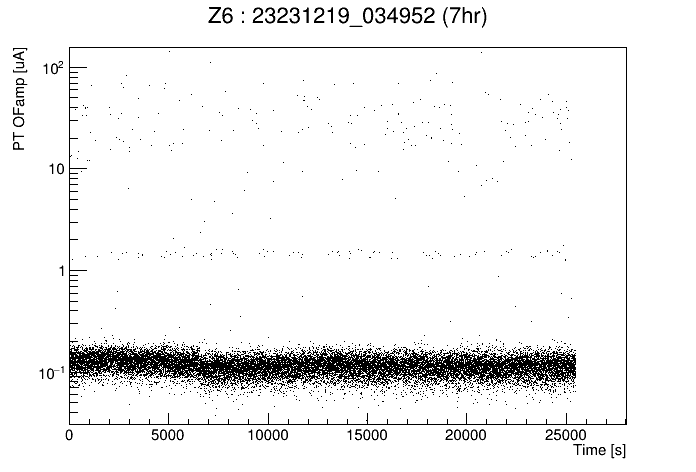

In [19]:
#gr_amp_t = rt.TGraph('gr_amp_t','gr_amp_t',0,10e3)
chan = 'PT'
det = 'Z6'
DetNum = int(det[-1])
idx = 0
key = list(series.keys())[0]
mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (TrigDet[idx] == DetNum) & (EventTime[idx] > 0.)
#print(mask)
t0 = EventTime[idx][mask][0]
#EventTime[0][mask] - t0

x = EventTime[idx][mask] - t0
y = OFamps[series[key]][det][chan][mask]*1e6
gr_amp_t = rt.TGraph(len(x),x,y)
gr_amp_t.SetTitle('%s : %s (%s)'%(det,series[key],key))
#gr_amp_t.SetTitle(det+ ' : ' +series[key]+ ' : ' +key )
gr_amp_t.GetXaxis().SetTitle('Time [s]')
gr_amp_t.GetYaxis().SetTitle('PT OFamp [uA]')
gr_amp_t.Draw('AP')
can.SetLogy()
can.Draw()
# print(len(x))
# print(len(y))

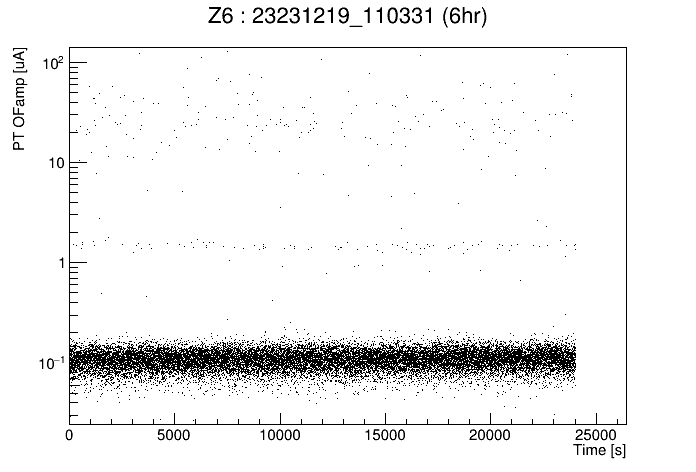

In [50]:
#gr_amp_t = rt.TGraph('gr_amp_t','gr_amp_t',0,10e3)
chan = 'PT'
det = 'Z6'
DetNum = int(det[-1])
idx = 1
key = list(series.keys())[idx]
mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (TrigDet[idx] == DetNum) & (EventTime[idx] > 0.)
#print(mask)
t0 = EventTime[idx][mask][0]
#EventTime[0][mask] - t0

x = EventTime[idx][mask] - t0
y = OFamps[series[key]][det][chan][mask]*1e6
gr_amp_t = rt.TGraph(len(x),x,y)
gr_amp_t.SetTitle('%s : %s (%s)'%(det,series[key],key))
#gr_amp_t.SetTitle(det+ ' : ' +series[key]+ ' : ' +key )
gr_amp_t.GetXaxis().SetTitle('Time [s]')
gr_amp_t.GetYaxis().SetTitle('PT OFamp [uA]')
gr_amp_t.Draw('AP')
can.SetLogy()
can.Draw()
# print(len(x))
# print(len(y))

In [51]:
chan = 'PT'
det = 'Z6'
DetNum = int(det[-1])
idx = 1
key = list(series.keys())[idx]
mask = (TriggerType[idx] == 1) & ((OFamps[series[key]][det][chan] > 1e-6) & (OFamps[series[key]][det][chan] < 2e-6)) & (TrigDet[idx] == DetNum) & (EventTime[idx] > 0.)
#mask = (TriggerType[idx] == 1) & ((OFamps[series[key]][det][chan] > 1.) ) & (TrigDet[idx] == DetNum) & (EventTime[idx] > 0.)
t0 = EventTime[idx][mask][0]
#EventTime[0][mask] - t0

x = EventTime[idx][mask] - t0
events = np.sum(mask)
t1 = np.max(x)
print('events = ',events )
print('in time = ',t1,'sec')
print('rate = %f Hz'%(float(events)/t1))


events =  90
in time =  23818.0 sec
rate = 0.003779 Hz


In [ ]:
89.0/25000

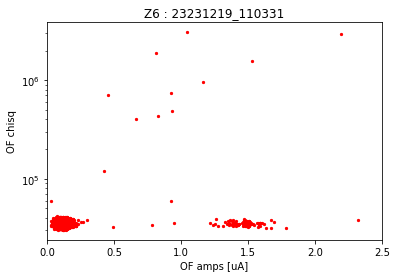

In [52]:
# Event selection
#Selecting saturated events
idx = 1
key = list(series.keys())[idx]
det = 'Z6'
DetNum = int(det[-1])
c = 'PT'


mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][c] > 0.) & (TrigDet[idx] == DetNum)
plt.scatter(OFamps[series[key]][det][c][mask]*1e6,OFchiq[series[key]][det][c][mask],s=5 ,color='r')

# plt.vlines(1.5, 0.6e6, 3e6)
# plt.vlines(2.0, 0.6e6, 3e6)
# plt.hlines(0.6e6, 1.5, 2.0)
# plt.hlines(3e6, 1.5, 2.0)

plt.xlim(0,2.5)
# plt.ylim(2e4,2e5)
plt.yscale("log")
plt.xlabel("OF amps [uA]")
plt.ylabel("OF chisq")
plt.title(det+ ' : ' + series[key])
#plt.savefig("./plots/reverse_cal/OF_chi2_%s_scatter.png"%(c))
plt.show()


In [99]:
(1.44/10.37)

0.13886210221793635

In [98]:
(1.44/10.37)*1.8

0.24995178399228543

In [53]:
det = 'Z6'
idx = 0
key = list(series.keys())[idx]

hname = 'h_chi2_ofamp_pt_%s'%(det)
htitle = 'chi^2 vs. Amp (%s, 7hr + 6hr);Amplitude (uA);chi2'%(det)
h_chi2_ofamp_pt = rt.TH2F(hname,htitle,150,0, 150,100,np.logspace(4.3, 7, 101)) 


hname = 'h_chi2_ofamp_pt_%s_zoomed'%(det)
htitle = 'chi^2 vs. Amp (%s, 7hr + 6hr);Amplitude (uA);chi2'%(det)
h_chi2_ofamp_pt_zoomed = rt.TH2F(hname,htitle,100,0, 2.5,100,np.logspace(4.3, 6, 101)) 

hname = 'h_ofamp_pt_%s'%(det)
htitle = '%s, 7hr + 6hr (chi2 < 6e4 & 1 < ofamp < 2)'%(det)
h_ofamp_pt = rt.TH1F(hname,htitle,200,0.5,2.5)


chan = 'PT'
DetNum = int(det[-1])

for idx, key in enumerate(series.keys()):
    
    mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (TrigDet[idx] == DetNum)
    print(idx,':',np.sum(mask))
    x = OFamps[series[key]][det][chan][mask]*1e6
    y = OFchiq[series[key]][det][chan][mask]

    for j in range(len(x)):
        h_chi2_ofamp_pt.Fill(x[j],y[j])
        h_chi2_ofamp_pt_zoomed.Fill(x[j],y[j])
        if((x[j] < 2) and (x[j] > 1) and (y[j] < 6e4)):
            h_ofamp_pt.Fill(x[j])
    print('Series %s:%s done...'%(series[key],key))

    

0 : 23871
Series 23231219_034952:7hr done...
1 : 22875
Series 23231219_110331:6hr done...


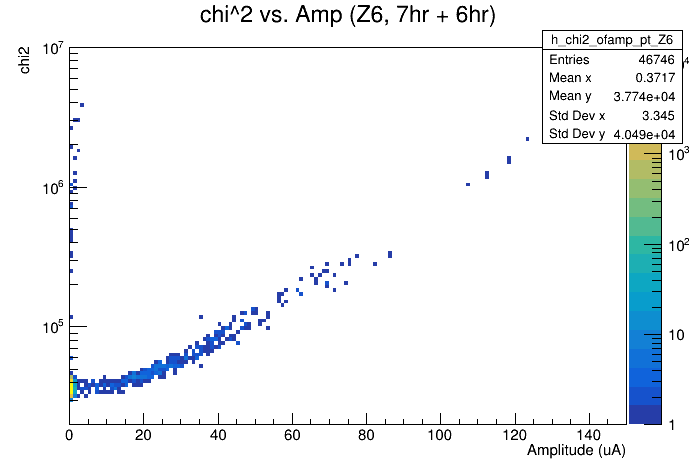

In [54]:
h_chi2_ofamp_pt.Draw('colz')
can.Draw()

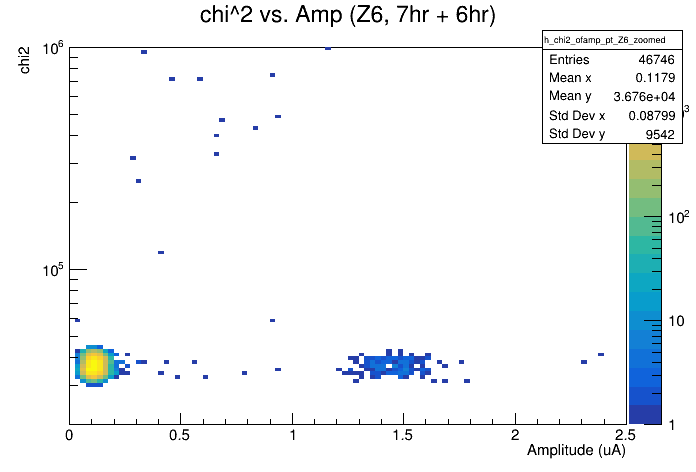

In [55]:
h_chi2_ofamp_pt_zoomed.Draw('colz')
can.Draw()

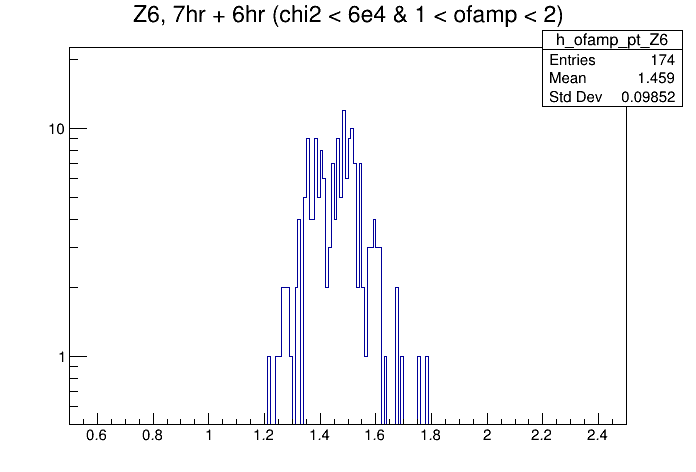

In [56]:
h_ofamp_pt.Draw()
can.Draw()

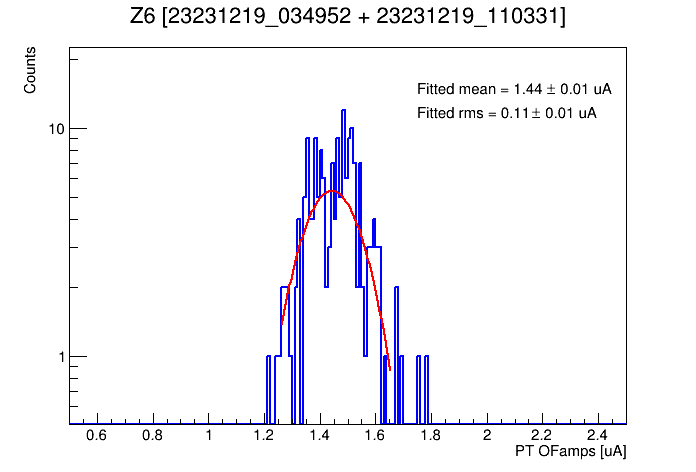

In [66]:
hist = h_ofamp_pt.Clone()

mean = hist.GetMean()
rms = hist.GetRMS()
fit_range = [mean - 2*rms, mean + 2*rms]
gaus = rt.TF1('gaus','gaus(0)',fit_range[0],fit_range[1])
gaus.SetParameters(10, mean, rms)
hist.Fit(gaus,'Q','',fit_range[0],fit_range[1])
gaus = hist.GetFunction('gaus')
mean = gaus.GetParameter(1)
rms = gaus.GetParameter(2)
mean_err = gaus.GetParError(1)
rms_err = gaus.GetParError(2)

#hist.Rebin(2)
rt.gStyle.SetOptStat(0)
#hist.SetName('Z6')
hist.GetXaxis().SetTitle('PT OFamps [uA]')
hist.GetYaxis().SetTitle('Counts')
hist.SetTitle('Z6 [%s + %s]'%(series['7hr'],series['6hr']))
hist.SetLineColor(rt.kBlue)
hist.SetLineWidth(2)
hist.Draw()
textOnTop = rt.TLatex()
# textOnTop.SetTextSize(0.05)
# textOnTop.DrawLatexNDC(0.6,0.8,'#bf{%s}'%(c))
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.6,0.8,'#bf{Fitted mean = %0.2f #pm %0.2f uA}'%(mean, mean_err))
textOnTop.DrawLatexNDC(0.6,0.75,'#bf{Fitted rms = %0.2f #pm %0.2f uA}'%(rms, rms_err))

#textOnTop.DrawLatexNDC(0.5,0.65,'#bf{Collection efficiency = %0.2f%%}'%((means[c]/10.37)*100))
can.Draw()

In [68]:
factor = 10.37/mean
2.5*factor

17.946668301736594

In [80]:
det = 'Z6'
idx = 0
key = list(series.keys())[idx]

factor = 10.37/mean

hname = 'h_ofamp_pt_%s'%(det)
htitle = '%s, 7hr + 6hr (chi2 < 6e4 & 1 < ofamp < 2)'%(det)
h_kev_pt = rt.TH1F(hname,htitle,300,0,30.0)


chan = 'PT'
DetNum = int(det[-1])

for idx, key in enumerate(series.keys()):
    
    mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (TrigDet[idx] == DetNum)
    print(idx,':',np.sum(mask))
    x = OFamps[series[key]][det][chan][mask]*1e6
    y = OFchiq[series[key]][det][chan][mask]

    for j in range(len(x)):
        
        if((x[j] > 1.) and (x[j] < 2.) and (y[j] < 6e4)):
            h_kev_pt.Fill(x[j]*factor)
    print('Series %s:%s done...'%(series[key],key))

    

0 : 23871
Series 23231219_034952:7hr done...
1 : 22875
Series 23231219_110331:6hr done...


Warning in <TROOT::Append>: Replacing existing TH1: h_ofamp_pt_Z6 (Potential memory leak).


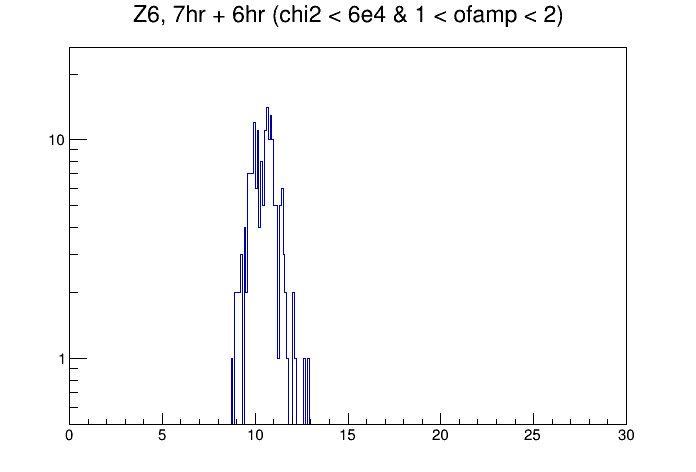

In [81]:
h_kev_pt.Draw()
can.Draw()

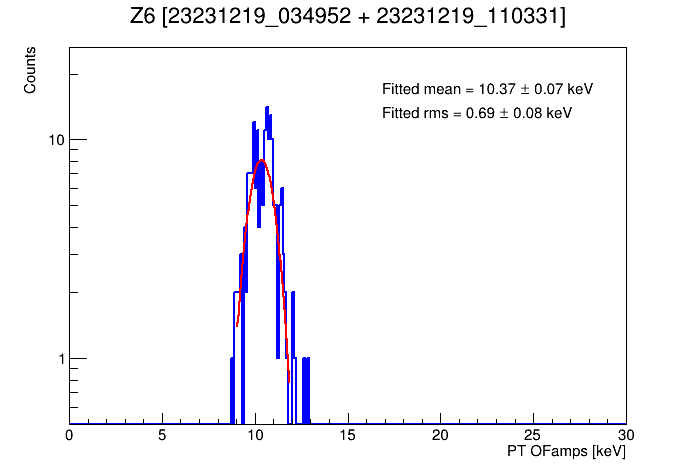

In [83]:
hist = h_kev_pt.Clone()

mean = hist.GetMean()
rms = hist.GetRMS()
fit_range = [mean - 2*rms, mean + 2*rms]
gaus = rt.TF1('gaus','gaus(0)',fit_range[0],fit_range[1])
gaus.SetParameters(10, mean, rms)
hist.Fit(gaus,'Q','',fit_range[0],fit_range[1])
gaus = hist.GetFunction('gaus')
mean = gaus.GetParameter(1)
rms = gaus.GetParameter(2)
mean_err = gaus.GetParError(1)
rms_err = gaus.GetParError(2)

#hist.Rebin(2)
rt.gStyle.SetOptStat(0)
#hist.SetName('Z6')
hist.GetXaxis().SetTitle('PT OFamps [keV]')
hist.GetYaxis().SetTitle('Counts')
hist.SetTitle('Z6 [%s + %s]'%(series['7hr'],series['6hr']))
hist.SetLineColor(rt.kBlue)
hist.SetLineWidth(2)
hist.Draw()
textOnTop = rt.TLatex()
# textOnTop.SetTextSize(0.05)
# textOnTop.DrawLatexNDC(0.6,0.8,'#bf{%s}'%(c))
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.55,0.8,'#bf{Fitted mean = %0.2f #pm %0.2f keV}'%(mean, mean_err))
textOnTop.DrawLatexNDC(0.55,0.75,'#bf{Fitted rms = %0.2f #pm %0.2f keV}'%(rms, rms_err))

#textOnTop.DrawLatexNDC(0.5,0.65,'#bf{Collection efficiency = %0.2f%%}'%((means[c]/10.37)*100))
can.Draw()

In [84]:
series

{'7hr': '23231219_034952', '6hr': '23231219_110331'}

In [100]:
(1.44/10.37)*1.3

0.18052073288331727

In [102]:
det = 'Z6'
idx = 0
key = list(series.keys())[idx]

factor = 10.37/1.44

hname = 'h_ofamp0_pt_%s'%(det)
htitle = '%s, 7hr'%(det)
h_baseline = rt.TH1F(hname,htitle,100,-0.2,0.2)
hname = 'h_ofamp0_kev_pt_%s'%(det)
htitle = '%s, 7hr'%(det)
h_baseline_kev = rt.TH1F(hname,htitle,100,-1,1)

chan = 'PT'
DetNum = int(det[-1])

mask = (TriggerType[idx] == 2) | (TriggerType[idx] == 3) & (TrigDet[idx] == DetNum)
print(idx,':',np.sum(mask))
x = OFamps0[series[key]][det][chan][mask]*1e6
#y = OFchiq[series[key]][det][chan][mask]

for j in range(len(x)):
    h_baseline.Fill(x[j])
    h_baseline_kev.Fill(x[j]*factor)

print('Series %s:%s done...'%(series[key],key))

    

0 : 1500
Series 23231219_034952:7hr done...


Warning in <TROOT::Append>: Replacing existing TH1: h_ofamp0_pt_Z6 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_ofamp0_kev_pt_Z6 (Potential memory leak).


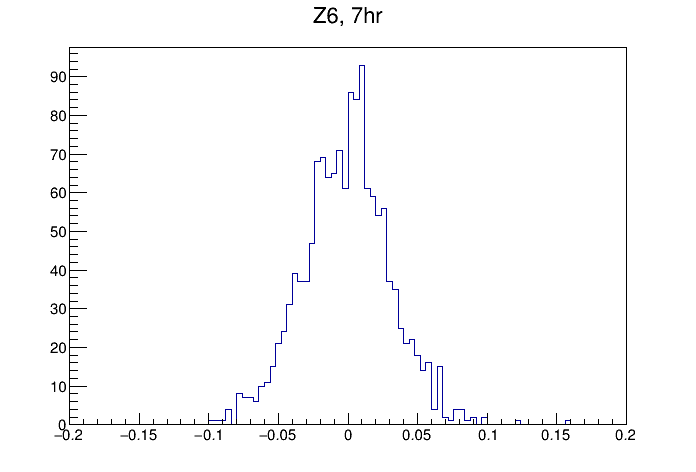

In [95]:
h_baseline.Draw()
can.SetLogy(0)
can.Draw()

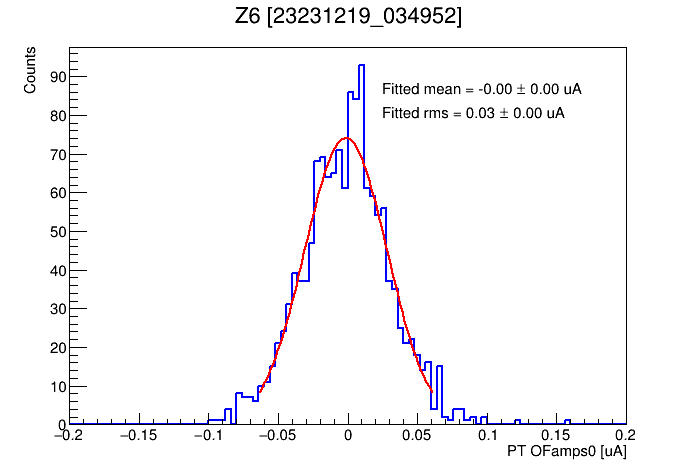

In [97]:
hist = h_baseline.Clone()

mean = hist.GetMean()
rms = hist.GetRMS()
fit_range = [mean - 2*rms, mean + 2*rms]
gaus = rt.TF1('gaus','gaus(0)',fit_range[0],fit_range[1])
gaus.SetParameters(10, mean, rms)
hist.Fit(gaus,'Q','',fit_range[0],fit_range[1])
gaus = hist.GetFunction('gaus')
mean = gaus.GetParameter(1)
rms = gaus.GetParameter(2)
mean_err = gaus.GetParError(1)
rms_err = gaus.GetParError(2)

#hist.Rebin(2)
rt.gStyle.SetOptStat(0)
#hist.SetName('Z6')
hist.GetXaxis().SetTitle('PT OFamps0 [uA]')
hist.GetYaxis().SetTitle('Counts')
hist.SetTitle('Z6 [%s]'%(series['7hr']))
hist.SetLineColor(rt.kBlue)
hist.SetLineWidth(2)
hist.Draw()
textOnTop = rt.TLatex()
# textOnTop.SetTextSize(0.05)
# textOnTop.DrawLatexNDC(0.6,0.8,'#bf{%s}'%(c))
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.55,0.8,'#bf{Fitted mean = %0.2f #pm %0.2f uA}'%(mean, mean_err))
textOnTop.DrawLatexNDC(0.55,0.75,'#bf{Fitted rms = %0.2f #pm %0.2f uA}'%(rms, rms_err))

#textOnTop.DrawLatexNDC(0.5,0.65,'#bf{Collection efficiency = %0.2f%%}'%((means[c]/10.37)*100))
can.Draw()

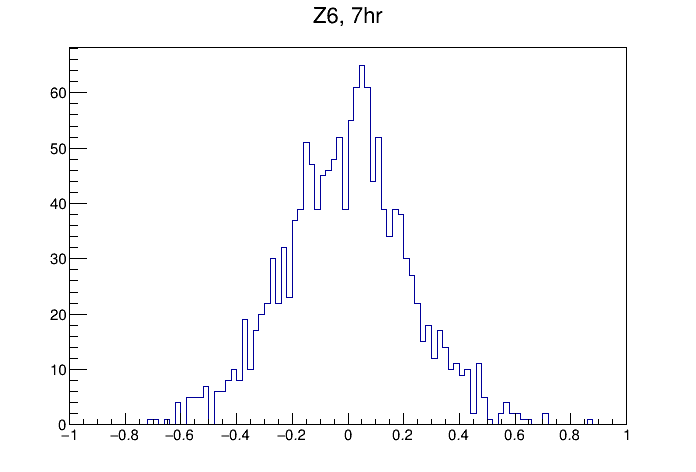

In [103]:
h_baseline_kev.Draw()
can.Draw()

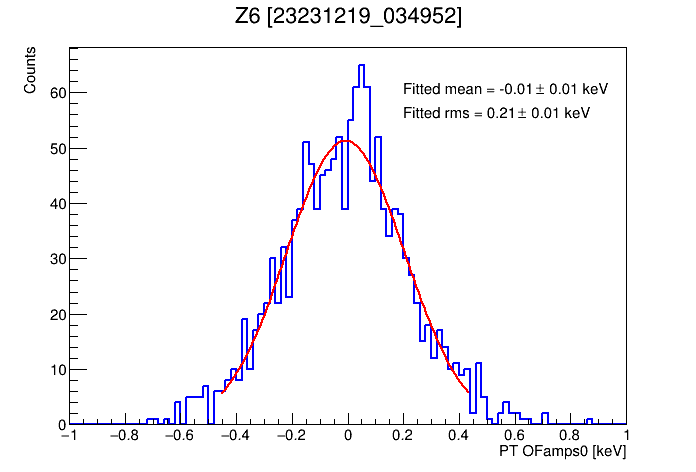

In [105]:
hist = h_baseline_kev.Clone()

mean = hist.GetMean()
rms = hist.GetRMS()
fit_range = [mean - 2*rms, mean + 2*rms]
gaus = rt.TF1('gaus','gaus(0)',fit_range[0],fit_range[1])
gaus.SetParameters(10, mean, rms)
hist.Fit(gaus,'Q','',fit_range[0],fit_range[1])
gaus = hist.GetFunction('gaus')
mean = gaus.GetParameter(1)
rms = gaus.GetParameter(2)
mean_err = gaus.GetParError(1)
rms_err = gaus.GetParError(2)

#hist.Rebin(2)
rt.gStyle.SetOptStat(0)
#hist.SetName('Z6')
hist.GetXaxis().SetTitle('PT OFamps0 [keV]')
hist.GetYaxis().SetTitle('Counts')
hist.SetTitle('Z6 [%s]'%(series['7hr']))
hist.SetLineColor(rt.kBlue)
hist.SetLineWidth(2)
hist.Draw()
textOnTop = rt.TLatex()
# textOnTop.SetTextSize(0.05)
# textOnTop.DrawLatexNDC(0.6,0.8,'#bf{%s}'%(c))
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.58,0.8,'#bf{Fitted mean = %0.2f #pm %0.2f keV}'%(mean, mean_err))
textOnTop.DrawLatexNDC(0.58,0.75,'#bf{Fitted rms = %0.2f #pm %0.2f keV}'%(rms, rms_err))

#textOnTop.DrawLatexNDC(0.5,0.65,'#bf{Collection efficiency = %0.2f%%}'%((means[c]/10.37)*100))
can.Draw()

In [106]:
0.03*(10.37/1.44)

0.21604166666666663

In [107]:
130./210

0.6190476190476191

In [57]:
h_chi2_ofamp_pt = []
h_chi2_ofamp_pt_zoomed = []
h_ofamp_pt = []

for key in series.keys():
    th_chi2_ofamp_pt_zoomed = {}
    th_chi2_ofamp_pt = {}
    
    th_ofamp_pt = {}
    for i,det in enumerate(dets):
        hname = 'h_chi2_ofamp_pt_%s_%s_zoomed'%(det,key)
        htitle = 'chi^2 vs. Amp (%s, %s);Amplitude (uA);chi2'%(det,lname[key])
        tth2dzoomed = rt.TH2F(hname,htitle,100,0, 20,100,np.logspace(4.3, 6, 101))        
        th_chi2_ofamp_pt_zoomed[det] = tth2dzoomed
        
        hname = 'h_chi2_ofamp_pt_%s_%s'%(det,key)
        htitle = 'chi^2 vs. Amplitude (%s, %s);Amplitude (uA);chi^2'%(det,lname[key])
        tth2d = rt.TH2F(hname,htitle, 100,0, 100,100,np.logspace(4.3, 7, 101))
        th_chi2_ofamp_pt[det] = tth2d
        
        hname = 'h_ofamp_pt_%s_%s'%(det,key)
        htitle = '%s, %s (chi2 < 5e4 & 1 < ofamp < 2)'%(det, lname[key])
        tth1d = rt.TH1F(hname,htitle,200,0.5,2.5)
        th_ofamp_pt[det] = tth1d
        
    h_chi2_ofamp_pt.append(th_chi2_ofamp_pt)
    h_chi2_ofamp_pt_zoomed.append(th_chi2_ofamp_pt_zoomed)
    h_ofamp_pt.append(th_ofamp_pt)




In [61]:
chan = 'PT'
det = 'Z6'

for idx,key in enumerate(series.keys()):
    mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (TrigDet[idx] == 6)
    print(idx,':',np.sum(mask))
    x = OFamps[series[key]][det][chan][mask]*1e6
    y = OFchiq[series[key]][det][chan][mask]

    for j in range(len(x)):
        h_chi2_ofamp_pt[idx][det].Fill(x[j],y[j])
        h_chi2_ofamp_pt_zoomed[idx][det].Fill(x[j],y[j])
#         if((x[j] < 2) and (x[j] > 1) and (y[j] < 5e4)):
#             h_ofamp_pt[idx][det].Fill(x[j])
    print('Series %s:%s done...'%(series[key],key))

    

0 : 28380
Series 23231217_212512:5hr done...
1 : 32831
Series 23231217_171613:4hr done...
2 : 44802
Series 23231217_135018:3hr done...


In [72]:
idx = 2
key = list(series.keys())[idx]
mask = (TriggerType[idx] == 1)  & (TrigDet[idx] == 6)
OFamps[series[key]][det][chan][mask]*1e6

array([-9.99999e+11, -9.99999e+11, -9.99999e+11, ..., -9.99999e+11,
       -9.99999e+11, -9.99999e+11])

In [53]:
can = rt.TCanvas()
can.SetLogy()
#rt.gStyle.SetOptStat(0)
can.SetLogz()


array([-9.99999000e+05,  6.43188778e-08, -9.99999000e+05, ...,
       -9.99999000e+05, -9.99999000e+05, -9.99999000e+05])

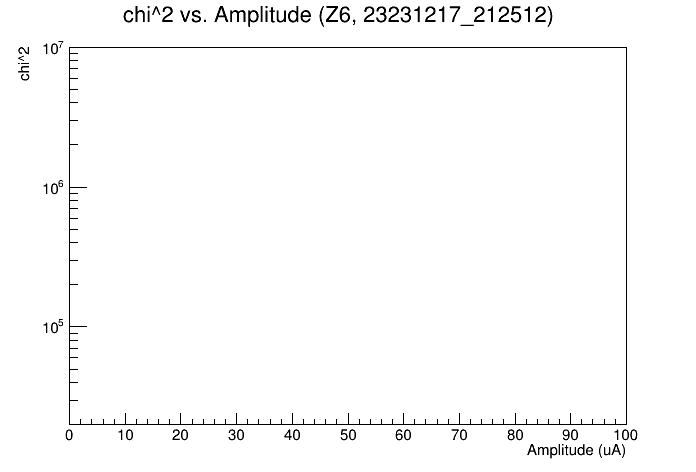

In [59]:
h_chi2_ofamp_pt[0][det].Draw('colz')
can.Draw()

In [7]:
#1.5*17.77
#NTL_gain = 17.77
NTL_gain = 1

In [8]:
h_chi2_ofamp_pt = []
h_chi2_ofamp_pt_zoomed = []
h_ofamp_pt = []



for key in series.keys():
    h2d_zoomed = rt.TH2F('h_chi2_ofamp_pt_%s_zoomed'%(key),'chi^2  vs. Amplitude (%s);Amplitude (uA);chi^2'%(series[key]),100,0, 20,100,np.logspace(4.3, 6, 101))
    h_chi2_ofamp_pt_zoomed.append(h2d_zoomed)
    h2d = rt.TH2F('h_chi2_ofamp_pt_%s'%(key),'chi^2 vs. Amplitude (%s);Amplitude (uA);chi^2'%(series[key]),100,0, 10,100,np.logspace(4.3, 8, 101))
    h_chi2_ofamp_pt.append(h2d)
    h1d = rt.TH1F('h_ofamp_pt_%s'%(key),'%s (chi2 < 1e5 & 1 < ofamp < 2)'%(series[key]),200,0.5,2.5)
    h_ofamp_pt.append(h1d)



In [36]:
chan = 'PT'
det = 'Z6'

for i,key in enumerate(series.keys()):
    mask = (TriggerType[i] == 1) & (OFamps[series[key]][chan] > 0.)# & (TrigDet[i] == 6)
    x = (OFamps[series[key]][chan][mask]*1e6)/NTL_gain
    y = OFchiq[series[key]][chan][mask]
    for j in range(len(x)):
        h_chi2_ofamp_pt[i].Fill(x[j],y[j])
        h_chi2_ofamp_pt_zoomed[i].Fill(x[j],y[j])
        #h_ofamp_pt[i].Fill(x[j])
        if((x[j] < 2) and (x[j] > 1) and (y[j] < 1e5)):
            h_ofamp_pt[i].Fill(x[j])
    print('%s done....'%(key))

log_bg done....


In [73]:
series

{'5hr': '23231217_212512', '4hr': '23231217_171613', '3hr': '23231217_135018'}

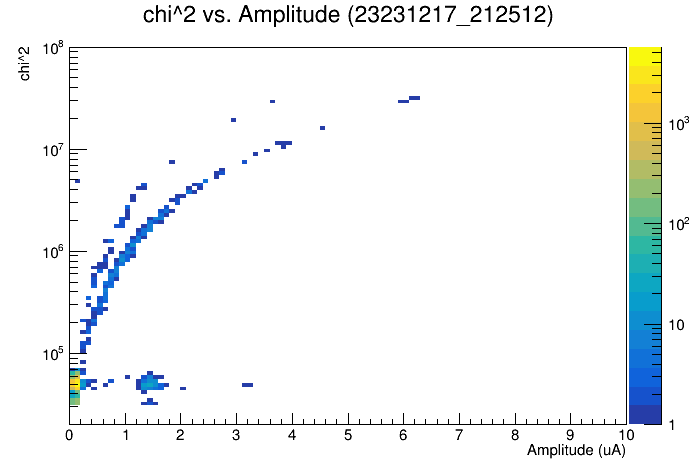

In [37]:
can = rt.TCanvas()
can.SetLogy()
rt.gStyle.SetOptStat(0)
can.SetLogz()
h_chi2_ofamp_pt[0].Draw('colz')
can.Draw()

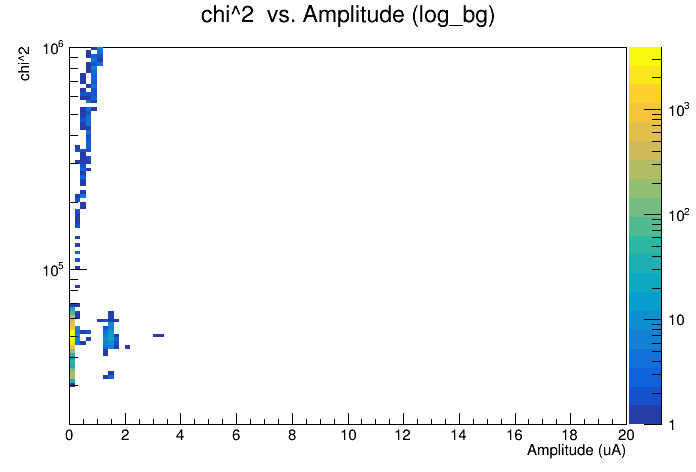

In [19]:
h_chi2_ofamp_pt_zoomed[0].Draw('colz')
can.Draw()

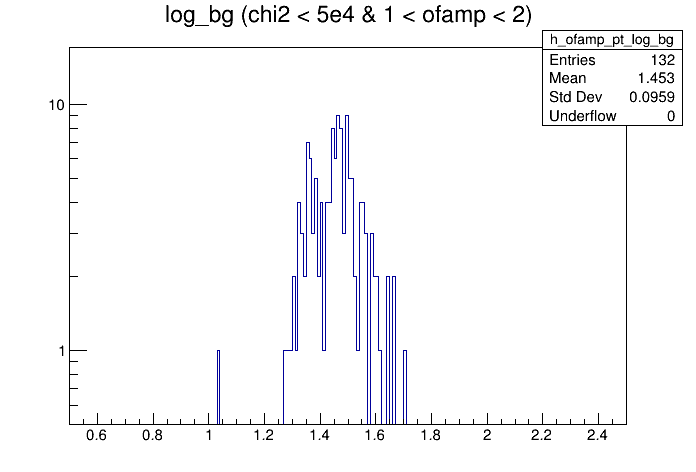

In [32]:
h_ofamp_pt[0].Draw()
rt.gStyle.SetOptStat(11111)
can.Draw()

In [27]:
h_ofamp_pt[0].GetEntries()

132.0

In [28]:
h_chi2_ofamp_pt[0].GetEntries()

16702.0

In [10]:
can = rt.TCanvas()
can.SetLogy()
rt.gStyle.SetOptStat(0)
can.SetLogz()

In [12]:
#gr_amp_t = rt.TGraph('gr_amp_t','gr_amp_t',0,10e3)
chan = 'PT'
key = '5hr'
det = 'Z6'
idx = 0
mask = (TriggerType[idx] == 1) & (OFamps[series[key]][det][chan] > 0.) & (EventTime[idx] > 0.) & (TrigDet[idx] == 6)
t0 = EventTime[idx][mask][0]
#EventTime[0][mask] - t0

x = EventTime[idx][mask] - t0
y = OFamps[series[key]][det][chan][mask]*1e6
gr_amp_t = rt.TGraph(len(x),x,y)
gr_amp_t.SetTitle(series[key]+ ' : ' +key )
gr_amp_t.GetXaxis().SetTitle('Time [s]')
gr_amp_t.GetYaxis().SetTitle('PT OFamp [uA]')
gr_amp_t.Draw('AP')
can.SetLogy()
can.Draw()
print(len(x))
print(len(y))

IndexError: index 0 is out of bounds for axis 0 with size 0

13391
13391


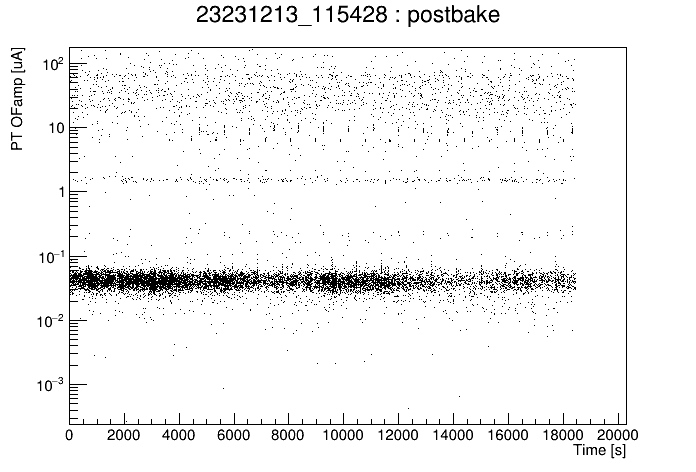

In [115]:
#gr_amp_t = rt.TGraph('gr_amp_t','gr_amp_t',0,10e3)
chan = 'PT'
key = 'postbake'
idx = 1
mask = (TriggerType[idx] == 1) & (OFamps[series[key]][chan] > 0.) & (EventTime[idx] > 0.)
t0 = EventTime[idx][mask][0]
#EventTime[0][mask] - t0

x = EventTime[idx][mask] - t0
y = OFamps[series[key]][chan][mask]*1e6
gr_amp_t = rt.TGraph(len(x),x,y)
gr_amp_t.SetTitle(series[key]+ ' : ' +key )
gr_amp_t.GetXaxis().SetTitle('Time [s]')
gr_amp_t.GetYaxis().SetTitle('PT OFamp [uA]')
gr_amp_t.Draw('AP')
can.SetLogy()
can.Draw()
print(len(x))
print(len(y))

In [66]:
c = 'PT'
dat = 'prebake'
mask = (TriggerType[0] == 1) & (OFamps[series[dat]][c] > 0.)
#h_chi2_ofamp_pt = rt.TH2F('h_chi2_ofamp_pt','\chi^2 \mbox{ vs. Amplitude};Amplitude (A);\chi^2',100,0, 2.5e-4,100,np.logspace(4.3, 8.4, 101))
h_chi2_ofamp_pt = rt.TH2F('h_chi2_ofamp_pt','\chi^2 \mbox{ vs. Amplitude} (%s);Amplitude (uA);\chi^2'%(dat),100,0, 10,100,np.logspace(4.3, 6, 101))
h_ofamp_pt = rt.TH1F('h_ofamp_pt','%s (chi2 < 5e4 & 1 < ofamp < 2 )'%(dat),200,0.5,2.5)
h_ofamp_pt.GetXaxis().SetTitle('PT OFAmps [uA]')
x = OFamps[series[dat]][c][mask]*1e6
y = OFchiq[series[dat]][c][mask]
for i in range(len(OFchiq[series[dat]][c][mask])):
    h_chi2_ofamp_pt.Fill(x[i],y[i])
    if((x[i] < 2) and (x[i] > 1) and (y[i] < 5e4)):
        h_ofamp_pt.Fill(x[i])
print('Done...')

Done...


<>:5: DeprecationWarning: invalid escape sequence \c
<>:5: DeprecationWarning: invalid escape sequence \c
<>:5: DeprecationWarning: invalid escape sequence \c
<ipython-input-66-e9035d618231>:5: DeprecationWarning: invalid escape sequence \c
  h_chi2_ofamp_pt = rt.TH2F('h_chi2_ofamp_pt','\chi^2 \mbox{ vs. Amplitude} (%s);Amplitude (uA);\chi^2'%(dat),100,0, 10,100,np.logspace(4.3, 6, 101))


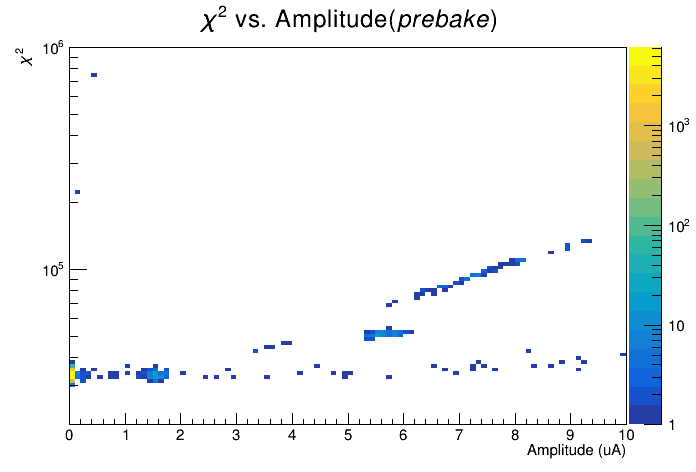

In [68]:
can = rt.TCanvas()
can.SetLogy()
rt.gStyle.SetOptStat(0)
can.SetLogz()
h_chi2_ofamp_pt.Draw('colz')
can.Draw()

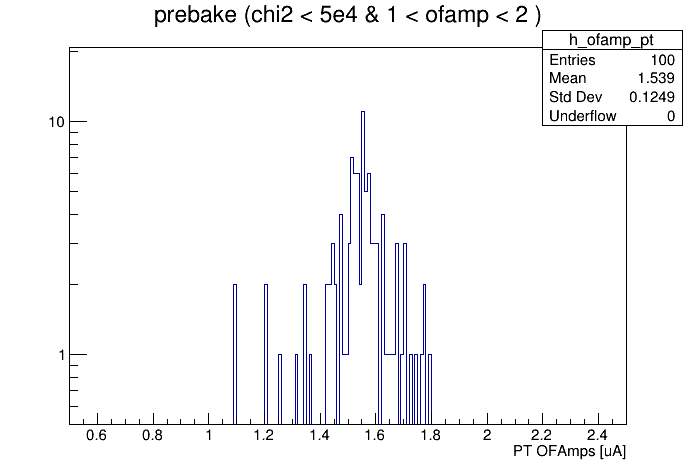

In [69]:
h_ofamp_pt.Draw()
rt.gStyle.SetOptStat(11111)
can.Draw()

In [27]:
h_ofamp_pt.GetEntries()

107.0

In [29]:
x[0:10]

array([2.87639633e-08, 4.78958130e-08, 6.06340127e-08, 3.29056191e-08,
       5.75420287e-08, 5.72963998e-08, 4.56184162e-08, 3.60516766e-08,
       4.02845714e-08, 5.95859903e-08])

In [13]:
#len(OFamps[series[dat]][c][mask])
len(OFchiq[series[dat]][c][mask])

12839

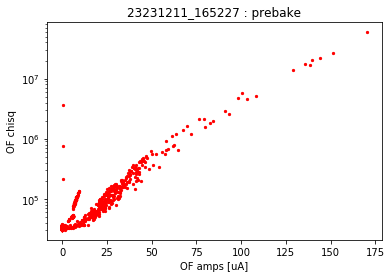

In [13]:
# Event selection
#Selecting saturated events
c = 'PT'
dat = 'prebake'
mask = (TriggerType[0] == 1) & (OFamps[series[dat]][c] > 0.)
plt.scatter(OFamps[series[dat]][c][mask]*1e6,OFchiq[series[dat]][c][mask],s=5 ,color='r')

# plt.vlines(1.05,1e4,2e5)
# plt.vlines(2.3,1e4,2e5)
# plt.hlines(2e5,1.05,2.3)

# plt.xlim(0,10)
# plt.ylim(1e4,1e8)
plt.yscale("log")
plt.xlabel("OF amps [uA]")
plt.ylabel("OF chisq")
plt.title(series[dat]+ ' : ' + dat)
#plt.savefig("./plots/reverse_cal/OF_chi2_%s_scatter.png"%(c))
plt.show()


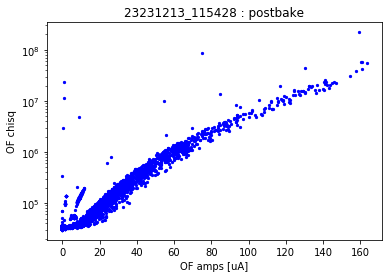

In [14]:
c = 'PT'
dat = 'postbake'
mask = (TriggerType[1] == 1) & (OFamps[series[dat]][c] > 0.)
plt.scatter(OFamps[series[dat]][c][mask]*1e6,OFchiq[series[dat]][c][mask],s=5 ,color='b')

# plt.vlines(1.05,1e4,2e5)
# plt.vlines(2.3,1e4,2e5)
# plt.hlines(2e5,1.05,2.3)

#plt.xlim(0,10)
#plt.ylim(1e4,1e8)
plt.yscale("log")
plt.xlabel("OF amps [uA]")
plt.ylabel("OF chisq")
plt.title(series[dat]+ ' : ' + dat)
#plt.savefig("./plots/reverse_cal/OF_chi2_%s_scatter.png"%(c))
plt.show()

In [82]:
c = 'PT'
dat = 'postbake'
mask = (TriggerType[1] == 1) & (OFamps[series[dat]][c] > 0.)
#h_chi2_ofamp_pt = rt.TH2F('h_chi2_ofamp_pt','\chi^2 \mbox{ vs. Amplitude};Amplitude (A);\chi^2',100,0, 2.5e-4,100,np.logspace(4.3, 8.4, 101))
h_chi2_ofamp_pt_post = rt.TH2F('h_chi2_ofamp_pt_post','\chi^2 \mbox{ vs. Amplitude} (%s);Amplitude (uA);\chi^2'%(dat),100,0, 10,100,np.logspace(4, 7, 101))
h_ofamp_pt_post = rt.TH1F('h_ofamp_pt_post','%s (chi2 < 5e4 & 1 < ofamp < 2 )'%(dat),200,0.5,2.5)
h_ofamp_pt_post.GetXaxis().SetTitle('PT OFAmps [uA]')
x = OFamps[series[dat]][c][mask]*1e6
y = OFchiq[series[dat]][c][mask]
for i in range(len(OFchiq[series[dat]][c][mask])):
    h_chi2_ofamp_pt_post.Fill(x[i],y[i])
    if((x[i] < 2) and (x[i] > 1) and (y[i] < 5e4)):
        h_ofamp_pt_post.Fill(x[i])
print('Done...')

Done...


<>:5: DeprecationWarning: invalid escape sequence \c
<>:5: DeprecationWarning: invalid escape sequence \c
<>:5: DeprecationWarning: invalid escape sequence \c
<ipython-input-82-929d0b625672>:5: DeprecationWarning: invalid escape sequence \c
  h_chi2_ofamp_pt_post = rt.TH2F('h_chi2_ofamp_pt_post','\chi^2 \mbox{ vs. Amplitude} (%s);Amplitude (uA);\chi^2'%(dat),100,0, 10,100,np.logspace(4, 7, 101))
Warning in <TROOT::Append>: Replacing existing TH1: h_chi2_ofamp_pt_post (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_ofamp_pt_post (Potential memory leak).


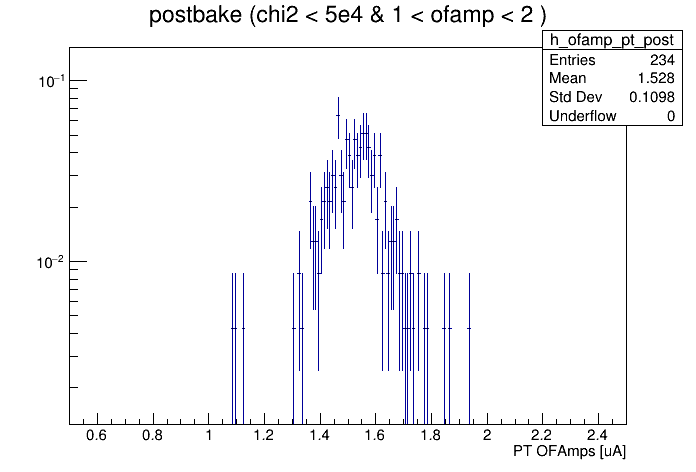

In [83]:
temp = h_ofamp_pt_post.Clone()
temp.Scale(1.0/temp.Integral())
temp.Draw()
can.Draw()

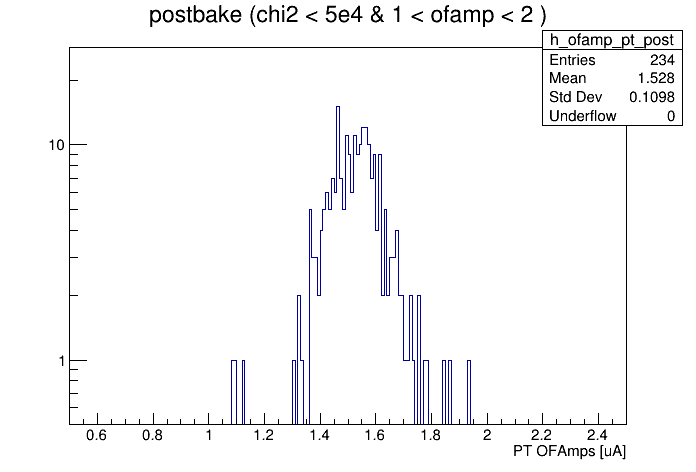

In [84]:
h_ofamp_pt_post.Draw()
can.Draw()

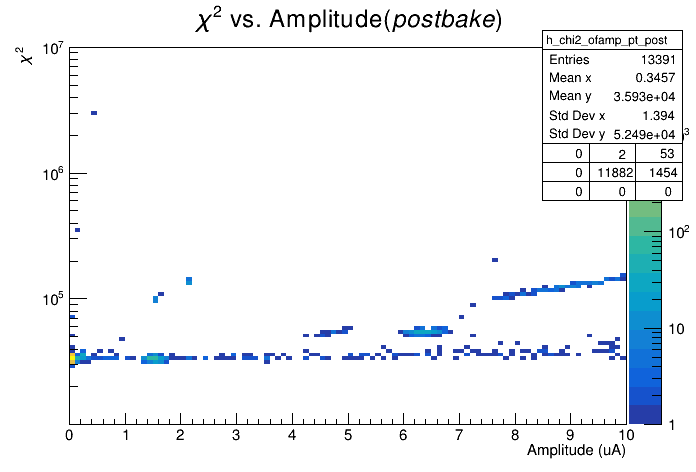

In [51]:
can = rt.TCanvas()
can.SetLogy()
#rt.gStyle.SetOptStat(0)
can.SetLogz()
h_chi2_ofamp_pt_post.Draw('colz')
can.Draw()

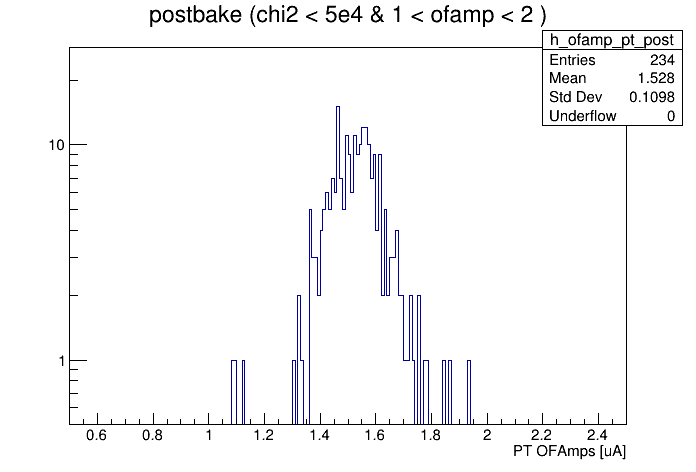

In [71]:
h_ofamp_pt_post.Draw()
can.Draw()

In [72]:
h_ofamp_pt.Scale(1./h_ofamp_pt.Integral())
h_ofamp_pt.Rebin(2)
h_ofamp_pt.SetLineColor(rt.kBlue)
h_ofamp_pt.SetLineStyle(1)
h_ofamp_pt.SetLineWidth(2)
h_ofamp_pt.SetTitle("")
h_ofamp_pt.GetYaxis().SetTitle('Normalized')

h_ofamp_pt_post.Scale(1./h_ofamp_pt_post.Integral())
h_ofamp_pt_post.Rebin(2)
h_ofamp_pt_post.SetLineColor(rt.kRed)
h_ofamp_pt_post.SetLineStyle(1)
h_ofamp_pt_post.SetLineWidth(2)
h_ofamp_pt_post.SetTitle("")
h_ofamp_pt_post.GetYaxis().SetTitle('Normalized')


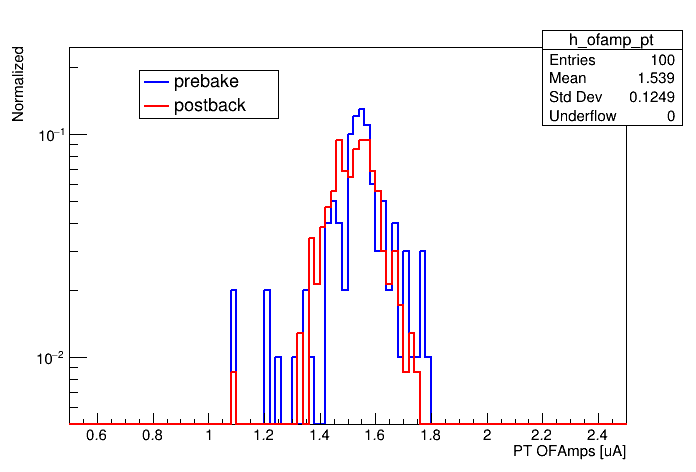

In [74]:
h_ofamp_pt.Draw('hist')
h_ofamp_pt_post.Draw('hist same')

l = rt.TLegend(0.2, 0.75, 0.4, 0.85) # x,y of top left and x,y of bottom right
l.AddEntry(h_ofamp_pt, "prebake", "l") # "l" to say it's just a line, no points
l.AddEntry(h_ofamp_pt_post, "postback", "l")

l.Draw()
can.Draw()